In [1]:
import numpy as np
from hmmlearn import hmm
import nltk
from nltk.tokenize import TweetTokenizer
from HMM import unsupervised_HMM
import matplotlib.pyplot as plt 
from HMM import unsupervised_HMM
from Utility import Utility
import os
import numpy as np
from IPython.display import HTML
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)



In [2]:
import pickle 

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    

def save_hmm(obj, name ):
    with open('HMMOutputs/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_hmm(name ):
    with open('HMMOutputs/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
def sequence_generator(n, k, M):
    '''
    Generates k emissions of length M using the HMM stored in the file
    'sequence_data<n>.txt' for a given n and prints the results.

    Arguments:
        N:          File index.
        K:          Number of sequences to generate.
        M:          Length of emission to generate.
    '''
    A, O, seqs = Utility.load_sequence(n)

    # Print file information.
    print("File #{}:".format(n))
    print("{:30}".format('Generated Emission'))
    print('#' * 70)

    # Generate k input sequences.
    for i in range(k):
        # Initialize an HMM.
        # Generate a single input sequence of length m.
        emission, states = HMM.generate_emission(M)
        x = ''.join([str(i) for i in emission])

        # Print the results.
        print("{:30}".format(x))

    print('')
    print('')

In [4]:
sentences_idx_arr = load_obj('sentences_idx_arr_with_punc_all')
syllables_dict = load_obj('syllables_dict_with_punc')

In [5]:
def normalize(mat):
    rows_sums = mat.sum(axis=1)
    normalized = mat/row_sums[:,np.newaxis]
    return normalized

In [6]:
HMM = unsupervised_HMM(sentences_idx_arr, 16, 1)


0 

In [57]:
A = load_hmm('trans_mat_epoch21')
O = load_hmm('emiss_mat_epoch21')
HMM.A = A
HMM.O = O
HMM.D = len(O[0])


In [60]:
words = list(syllables_dict.keys())

    
for i in range(10):
    # Initialize an HMM.
    # Generate a single input sequence of length m.
    emission, states = HMM.generate_emission(10)
    emission.reverse()
    x = ' '.join([words[i] for i in emission])

    # Print the results.
    print("{:30}".format(x))


' there and red to nature true hideous face ,
you will muse the possessing , o in the blessed
have earth bitter and thy that or more thought staineth
to a about familiar which i to to thee to
by but which brass loves me so away flowers use
that have doting loss badness this eye , or dear
who painting appeal appearance that lodged of my free :
whether colour dregs that no mine fame whilst by mine
tempting thy so this my live i clearer prepare ?
that say , give from as with my one (


# HMM OUTPUT VISUALIZATION

In [61]:
def visualize_sparsities(A, O, O_max_cols=3000, O_vmax=0.1):
    plt.close('all')
    plt.set_cmap('viridis')

    # Visualize sparsity of A.
    plt.imshow(A, vmax=max([max(r) for r in A]))
    plt.colorbar()
    plt.title('Sparsity of A matrix')
    plt.show()

    # Visualize parsity of O.
    plt.imshow(np.array(O)[:, :O_max_cols], vmax=max([max(r) for r in O]), aspect='auto')
    plt.colorbar()
    plt.title('Sparsity of O matrix')
    plt.show()

In [67]:
def states_to_wordclouds(hmm, obs_map, max_words=50, show=True):
    # Initialize.
    M = 1000
    n_states = len(hmm.A)
    wordclouds = []

    # Generate a large emission.
    emission, states = hmm.generate_emission(M)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    # For each state, convert it into a wordcloud.
    for i in range(n_states):
        obs_lst = obs_count[i]
        sentence = [words[j] for j in obs_lst]
        sentence_str = ' '.join(sentence)
        sentence_str +=  'punctuation'

        wordclouds.append(text_to_wordcloud(sentence_str, max_words=max_words, title='State %d' % i, show=show))

    return wordclouds

In [68]:
def animate_emission(hmm, obs_map, M=8, height=12, width=12, delay=1):
    # Parameters.
    lim = 1200
    text_x_offset = 40
    text_y_offset = 80
    x_offset = 580
    y_offset = 520
    R = 420
    r = 100
    arrow_size = 20
    arrow_p1 = 0.03
    arrow_p2 = 0.02
    arrow_p3 = 0.06
    
    # Initialize.
    n_states = len(hmm.A)
    wordclouds = states_to_wordclouds(hmm, obs_map, max_words=20, show=False)

    # Initialize plot.    
    fig, ax = plt.subplots()
    fig.set_figheight(height)
    fig.set_figwidth(width)
    ax.grid('off')
    plt.axis('off')
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])

    # Plot each wordcloud.
    for i, wordcloud in enumerate(wordclouds):
        x = x_offset + int(R * np.cos(np.pi * 2 * i / n_states))
        y = y_offset + int(R * np.sin(np.pi * 2 * i / n_states))
        ax.imshow(wordcloud.to_array(), extent=(x - r, x + r, y - r, y + r), aspect='auto', zorder=-1)

    # Initialize text.
    text = ax.text(text_x_offset, lim - text_y_offset, '', fontsize=24)
        
    # Make the arrows.
    zorder_mult = n_states ** 2 * 100
    arrows = []
    for i in range(n_states):
        row = []
        for j in range(n_states):
            # Arrow coordinates.
            x_i = x_offset + R * np.cos(np.pi * 2 * i / n_states)
            y_i = y_offset + R * np.sin(np.pi * 2 * i / n_states)
            x_j = x_offset + R * np.cos(np.pi * 2 * j / n_states)
            y_j = y_offset + R * np.sin(np.pi * 2 * j / n_states)
            
            dx = x_j - x_i
            dy = y_j - y_i
            d = np.sqrt(dx**2 + dy**2)

            if i != j:
                arrow = ax.arrow(x_i + (r/d + arrow_p1) * dx + arrow_p2 * dy,
                                 y_i + (r/d + arrow_p1) * dy + arrow_p2 * dx,
                                 (1 - 2 * r/d - arrow_p3) * dx,
                                 (1 - 2 * r/d - arrow_p3) * dy,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))
            else:
                arrow = ax.arrow(x_i, y_i, 0, 0,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))

            row.append(arrow)
        arrows.append(row)

    emission, states = hmm.generate_emission(M)

    def animate(i):
        if i >= delay:
            i -= delay

            if i == 0:
                arrows[states[0]][states[0]].set_color('red')
            elif i == 1:
                arrows[states[0]][states[0]].set_color((1 - hmm.A[states[0]][states[0]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')
            else:
                arrows[states[i - 2]][states[i - 1]].set_color((1 - hmm.A[states[i - 2]][states[i - 1]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')

            # Set text.
            text.set_text(' '.join([obs_map[e] for e in emission][:i+1]).capitalize())

            return arrows + [text]

    # Animate!
    #print('\nAnimating...')
    #anim = FuncAnimation(fig, animate, frames=M+delay, interval=1000)

    pass

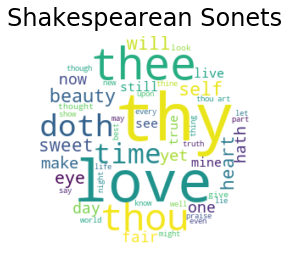

In [69]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespearean Sonets')

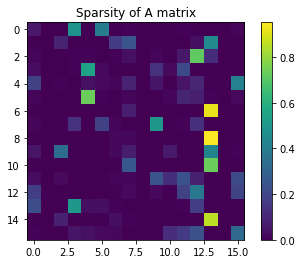

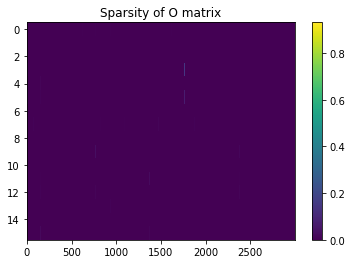

In [70]:
visualize_sparsities(HMM.A, HMM.O)

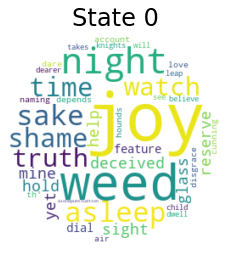

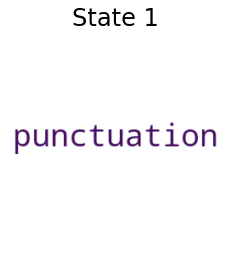

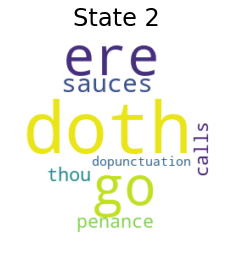

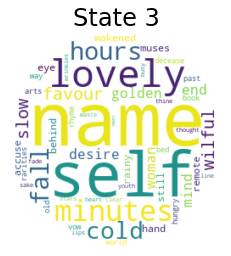

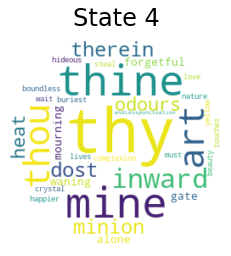

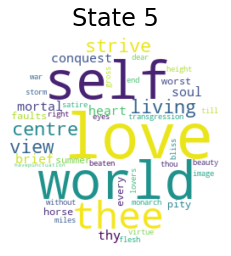

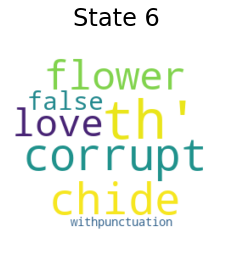

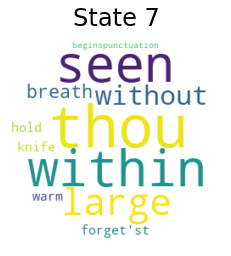

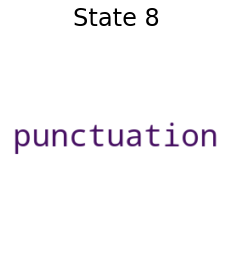

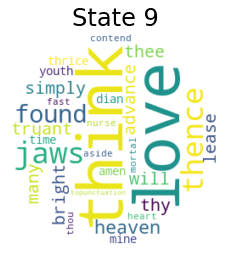

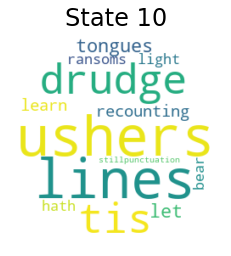

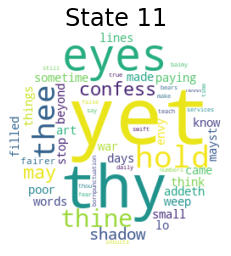

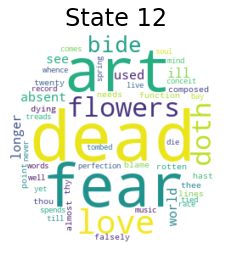

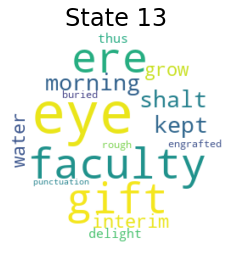

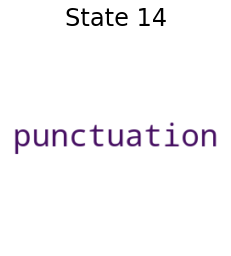

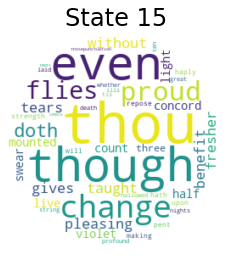

In [71]:
wordclouds = states_to_wordclouds(HMM, obs_map = words)

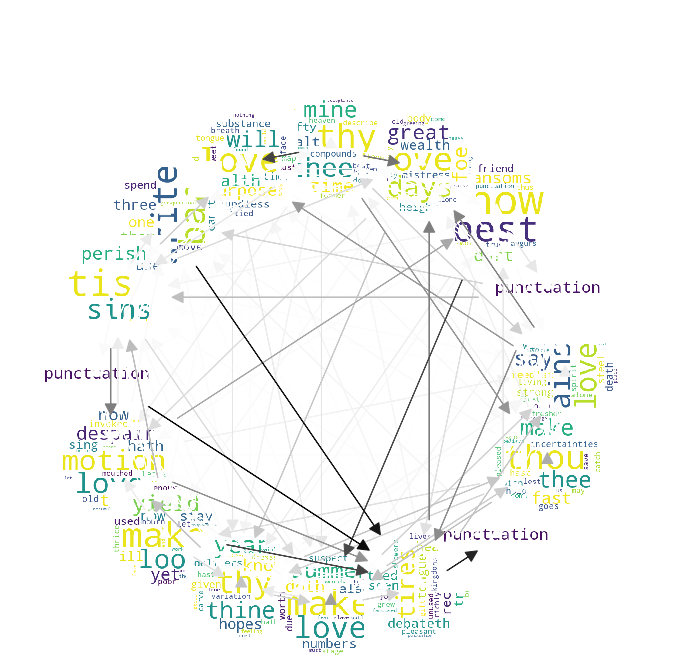

In [72]:
animate_emission(HMM, words)